In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('./data.csv')

In [23]:
x = data.iloc[:,:-1].values
y = data.iloc[:,4:5].values
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [25]:
scale = StandardScaler()
x_norm = scale.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_norm ,y , test_size=0.2 , random_state=0)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x_train) #new features

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression().fit(x_poly,y_train)
y_pred = model.predict(poly.fit_transform(x_test))


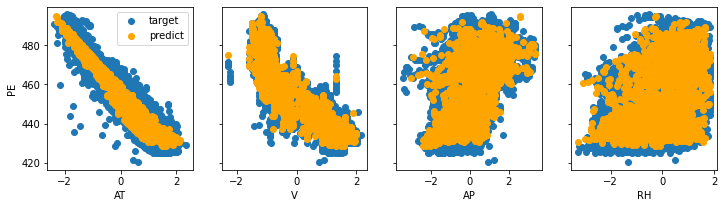

In [35]:
x_features = data.columns[:-1]
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_test[:,i],y_pred,color='orange', label = 'predict')
ax[0].set_ylabel("PE");
ax[0].legend();
plt.show()

### OR

In [32]:
from sklearn.pipeline import make_pipeline


In [33]:
poly = PolynomialFeatures(degree=3)
model = make_pipeline(poly, LinearRegression())
model.fit(x_train, y_train)
y_pred_poly = model.predict(x_test)


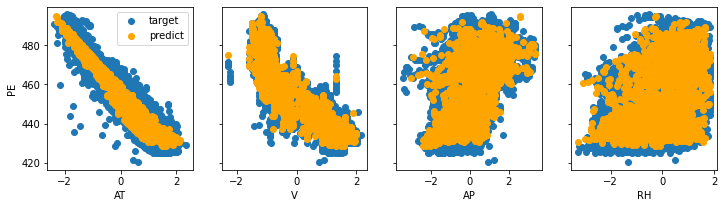

In [34]:
x_features = data.columns[:-1]
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_test[:,i],y_pred_poly,color='orange', label = 'predict')
ax[0].set_ylabel("PE");
ax[0].legend();
plt.show()